# Finding spacecraft earth and moon distances

As well as spacecraft velocity and position with respect to the solar system barycenter, you can also calculate the position and velocity with respect to the earth and moon.

In [43]:
from lkspacecraft import KeplerSpacecraft, TESSSpacecraft
import matplotlib.pyplot as plt
from astropy.time import Time
import numpy as np

First we load the spacecraft object

In [44]:
ks = KeplerSpacecraft()

Now we must pick a time that we want to get the position or velocity. I will create a vector which spans the duration of the SPICE kernels

In [45]:
start, end = ks.start_time, ks.end_time

In [46]:
start, end

(<Time object: scale='utc' format='datetime' value=2009-03-07 06:22:56.000025>,
 <Time object: scale='utc' format='datetime' value=2019-12-29 23:58:50.815000>)

In [47]:
t = Time(np.linspace(start.jd + 1, end.jd - 1, 5000), format='jd')

`t` is now an `astropy.time.Time` object with 5000 points, uniformly spaced from the start of the SPICE kernel time range, to the end. Let's get the spacecraft position

In [48]:
position = ks.get_spacecraft_position(t, "earth")

In [49]:
position

array([[-2.04469635e+05,  8.53262718e+04,  1.11504844e+05],
       [-3.10023611e+05,  1.08990868e+05,  1.60844558e+05],
       [-4.03007391e+05,  1.29036556e+05,  2.03009433e+05],
       ...,
       [ 1.56225494e+08, -9.43050976e+07, -4.17449450e+07],
       [ 1.57610492e+08, -9.23432888e+07, -4.09067947e+07],
       [ 1.58966185e+08, -9.03630495e+07, -4.00604877e+07]])

This is the position in *km*, in Cartesian coordinates, with the origin at the earth.

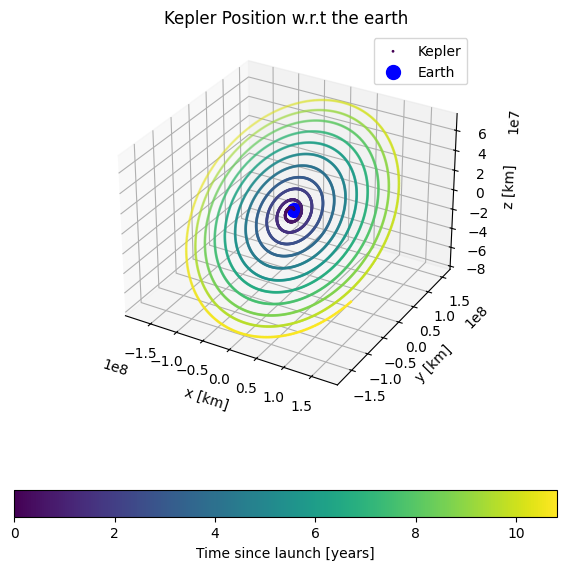

In [50]:
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
im = ax.scatter(*position.T, label='Kepler', c=(t.jd - t.jd[0])/365, s=1)
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label("Time since launch [years]")
ax.scatter(0, 0, 0, label='Earth', c='blue', marker='o', s=100)
ax.set(title='Kepler Position w.r.t the earth', xlabel='x [km]', ylabel='y [km]', zlabel='z [km]')
ax.legend();

You can see Kepler's earth trailing orbit slowly getting further and further from earth. 

Let's try the same thing with TESS

In [51]:
ts = TESSSpacecraft()
t = Time(np.linspace(ts.start_time.jd + 500, ts.end_time.jd - 1, 15000), format='jd')

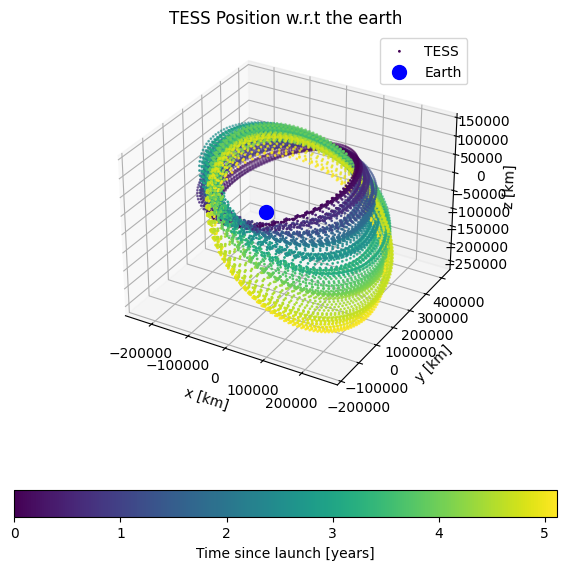

In [52]:
position = ts.get_spacecraft_position(t, "earth")

fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
im = ax.scatter(*position.T, label='TESS', c=(t.jd - t.jd[0])/365, s=1)
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label("Time since launch [years]")
ax.scatter(0, 0, 0, label='Earth', c='blue', marker='o', s=100)
ax.set(title='TESS Position w.r.t the earth', xlabel='x [km]', ylabel='y [km]', zlabel='z [km]')
ax.legend();

You can see TESS's orbit around earth slowly precessing. Let's look at the distance between the moon

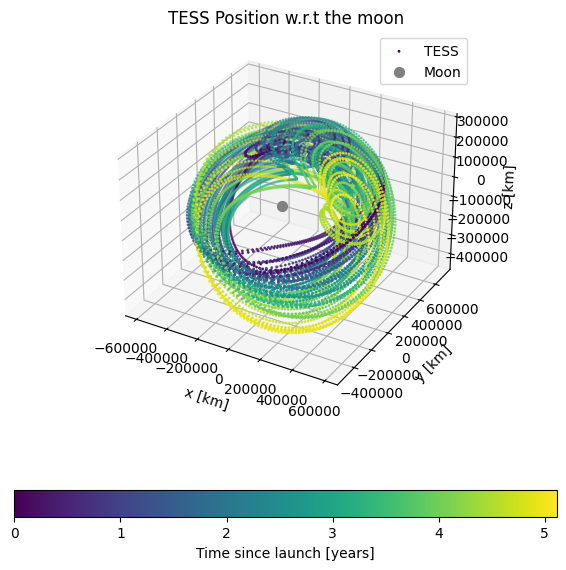

In [53]:
position = ts.get_spacecraft_position(t, "moon")

fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
im = ax.scatter(*position.T, label='TESS', c=(t.jd - t.jd[0])/365, s=1)
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label("Time since launch [years]")
ax.scatter(0, 0, 0, label='Moon', c='grey', marker='o', s=50)
ax.set(title='TESS Position w.r.t the moon', xlabel='x [km]', ylabel='y [km]', zlabel='z [km]')
ax.legend();

Here we see a much more complicated orbit!

If you want to see the earth and moon positions with respect to the TESS spacecraft, you can do this by simply taking the negative of the positions. 

In [109]:
position = -ts.get_spacecraft_position(t, "moon")

This is now the position of the moon, with respect to TESS. You can convert this to spherical coordinates to obtain the distance, inclination and azimuthal angle to the moon

In [112]:
dist = np.sum(position**2, axis=1)**0.5
inclination = np.rad2deg(np.arcsin(position[:, 2] / dist))
azimuth = np.rad2deg(np.arctan2(position[:, 1], position[:, 0]))

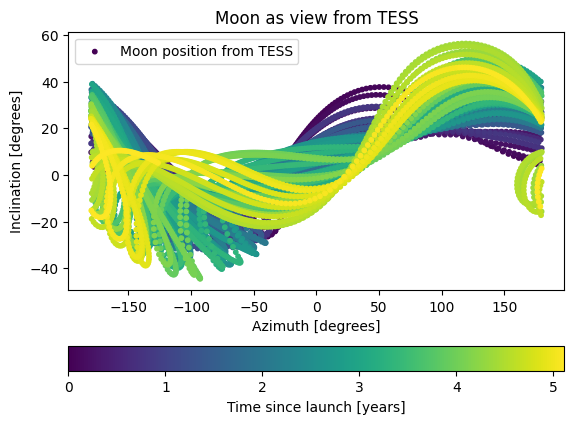

In [116]:
fig, ax = plt.subplots()
im = ax.scatter(azimuth, inclination, s=10, c=(t.jd - t.jd[0])/365, label='Moon position from TESS')
cbar = plt.colorbar(im, ax=ax, orientation='horizontal')
cbar.set_label("Time since launch [years]")
ax.set(xlabel='Azimuth [degrees]', ylabel='Inclination [degrees]', title='Moon as view from TESS')
ax.legend()

`lkspacecraft` is only providing the position of the earth and moon with respect to the spacecraft. This doesn't take into account the orientation of the cameras on the spacecraft, and so as of yet there isn't a way to directly relate this to a pixel position.